In [31]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy.stats import ranksums

### Prosody Feats

In [32]:

import numpy as np
from sklearn import metrics
import sklearn



def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [33]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


In [34]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [35]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected
    


In [36]:
prosody = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GERMAN/Acoustic/Prosody/prosody.csv')
prosody = prosody.sort_values("id")
prosody = prosody.drop(columns=['Unnamed: 0'])
intensity = pd.read_csv('/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GERMAN/Acoustic/Prosody/Harmonics.csv')
intensity = intensity.sort_values("sound_filepath")
intensity = intensity.drop(columns=['Unnamed: 0'])
prosody['intensity'] = intensity['stddev_intensity'].tolist()
             
prosody 
                         


,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP,id,intensity
0,133.508619,49.409403,348.721989,60.146938,2.785003,8.156885,135.866595,97.986903,793.840590,266.073381,...,1.05,0.15,1.899332,6.925234,0.274262,0.725738,0.382102,0.144399,CN_089_concatenateread_German.wav,122.580104
1,133.674118,38.540226,348.626798,59.861818,2.557039,12.182884,-83.792260,87.656966,540.374730,199.349342,...,1.60,0.15,1.629344,6.364095,0.256021,0.743979,0.456612,0.157132,CN_089_monologue_German.wav,7.735348
2,138.580756,47.278954,349.236293,60.668221,2.562408,8.354040,25.412466,117.280330,705.921851,322.484920,...,0.66,0.15,1.187520,5.012821,0.236897,0.763103,0.642602,0.199488,CN_089_readtext_German.wav,8.224597
3,119.112443,35.523719,345.623906,60.999797,3.768325,19.426420,-67.590683,100.329361,464.496425,326.981083,...,1.67,0.15,2.040657,7.594631,0.268697,0.731303,0.358366,0.131672,CN_090_concatenateread_German.wav,104.928546
4,109.353194,26.837263,317.386606,60.122274,2.926254,13.699351,-93.262954,46.586533,381.015603,91.092825,...,1.62,0.16,1.700269,6.476190,0.262542,0.737458,0.433730,0.154412,CN_090_monologue_German.wav,9.808596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,178.568416,36.775752,349.202646,65.984655,0.986811,3.052639,-106.753938,110.149774,382.321327,233.617194,...,3.41,0.15,3.461604,14.720812,0.235150,0.764850,0.220952,0.067931,PD_087_monologue_German.wav,16.767527
524,171.408119,29.901551,349.979456,61.893912,0.129842,6.377758,-52.254050,105.109392,241.649869,216.859382,...,1.28,0.15,1.331232,6.051515,0.219983,0.780017,0.585936,0.165248,PD_087_readtext_German.wav,12.907071
525,150.936943,21.303275,335.578188,61.655190,3.635017,27.212242,-70.474020,46.093449,166.962341,92.118472,...,2.45,0.17,2.779449,21.123810,0.131579,0.868421,0.312444,0.047340,PD_088_concatenateread_German.wav,83.601519
526,115.712852,23.300333,322.020608,59.825025,2.193815,17.182977,-168.089471,50.433737,362.930091,89.854152,...,4.33,0.21,6.013020,27.984375,0.214871,0.785129,0.130572,0.035734,PD_088_monologue_German.wav,15.853081


In [37]:
#prosody.to_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/GERMAN/Acoustic/Prosody/total_pros_int.csv")

In [38]:
prosody = prosody.drop(columns=['F0avg', 'F0max', 'F0min', 'F0kurt', 'F0skew', 
'F0tiltavg',
'F0mseavg', 
'F0tiltstd',
'F0msestd',
'F0tiltmax',
'F0msemax',
'F0tiltmin',
'F0msemin',
'F0tiltskw',
'F0mseskw',
'F0tiltku',
'F0mseku',
'1F0mean',
#'1F0std',
'1F0max',
'1F0min',
'1F0skw',
'1F0ku',
'lastF0avg',
'lastF0std',
'lastF0max',
'lastF0min',
'lastF0skw',
'lastF0ku',
'avgEvoiced',
'stdEvoiced',
'skwEvoiced',
'kurtosisEvoiced',
'avgtiltEvoiced',
'stdtiltEvoiced',
'skwtiltEvoiced',
'kurtosistiltEvoiced',
'avgmseEvoiced',
'stdmseEvoiced',
'skwmseEvoiced',
'kurtosismseEvoiced',
'avg1Evoiced',
'std1Evoiced',
'max1Evoiced',
'min1Evoiced',
'skw1Evoiced',
'kurtosis1Evoiced',
'avglastEvoiced',
'stdlastEvoiced',
'maxlastEvoiced',
'minlastEvoiced',
'skwlastEvoiced',
'kurtosislastEvoiced',
'avgEunvoiced',
'stdEunvoiced',
'skwEunvoiced',
'kurtosisEunvoiced',
'avgtiltEunvoiced',
'stdtiltEunvoiced',
'skwtiltEunvoiced',
'kurtosistiltEunvoiced',
'avgmseEunvoiced',
'stdmseEunvoiced',
'skwmseEunvoiced',
'kurtosismseEunvoiced',
'avg1Eunvoiced',
'std1Eunvoiced',
'max1Eunvoiced',
'min1Eunvoiced',
'skw1Eunvoiced',
'kurtosis1Eunvoiced',
'avglastEunvoiced',
'stdlastEunvoiced',
'maxlastEunvoiced',
'minlastEunvoiced',
'skwlastEunvoiced',
'kurtosislastEunvoiced',
'Vrate',
'avgdurvoiced',
'stddurvoiced',
'skwdurvoiced',
'kurtosisdurvoiced',
'maxdurvoiced',
'mindurvoiced',
'avgdurunvoiced',
'stddurunvoiced',
'skwdurunvoiced',
'kurtosisdurunvoiced',
'maxdurunvoiced',
'mindurunvoiced',
'avgdurpause',
'stddurpause',
'skwdurpause',
'kurtosisdurpause',
'maxdurpause',
'mindurpause',
'PVU',
'PU',
'UVU',
'VVU',
'VP',
'UP'])

In [39]:
prosody

,F0std,1F0std,id,intensity
0,49.409403,11.548270,CN_089_concatenateread_German.wav,122.580104
1,38.540226,7.528810,CN_089_monologue_German.wav,7.735348
2,47.278954,5.108344,CN_089_readtext_German.wav,8.224597
3,35.523719,6.285960,CN_090_concatenateread_German.wav,104.928546
4,26.837263,7.071345,CN_090_monologue_German.wav,9.808596
...,...,...,...,...
523,36.775752,9.592875,PD_087_monologue_German.wav,16.767527
524,29.901551,12.713390,PD_087_readtext_German.wav,12.907071
525,21.303275,14.719324,PD_088_concatenateread_German.wav,83.601519
526,23.300333,7.815811,PD_088_monologue_German.wav,15.853081


In [40]:
#prosody = prosody.drop(columns=['Unnamed: 0'])
prosody['label']=prosody['id'].str.split('_').str[0]

In [41]:
tasks = []
names =prosody['id'].tolist()
for e in names:
    ok = e.split("_", 2)[2]
    ok = ok.split("_", 1)[0]
    tasks.append(ok)
prosody['tasks'] = tasks
df = prosody

In [42]:
df=df.drop(columns=[ 'id'])

In [43]:
task = df.groupby("tasks")
conc =  task.get_group("concatenateread")
monologue = task.get_group("monologue")
read = task.get_group("readtext")

## Monologue



In [44]:
grouped = monologue.groupby("label") #here we extract the values by category
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = monologue.columns[:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monologue.columns[:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(monologue.columns[:-2])])



with open('/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Results/monologue.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Results/monologue.txt')
holm_correction(kruskal_1)

(['kruskal results for F0std controls vs. parkinson 3.3462369651932213e-06 ',
  'kruskal results for intensity controls vs. parkinson 6.658269200607934e-09 '],
 [5.019355447789832e-06, 1.99748076018238e-08])

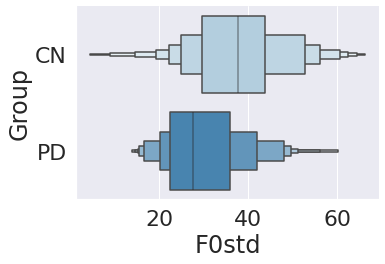

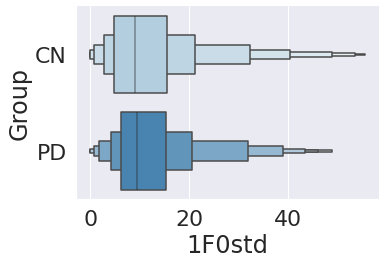

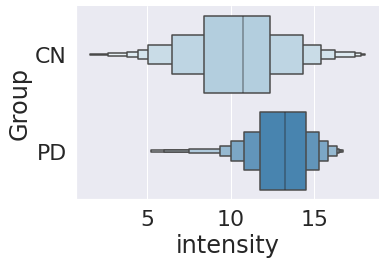

In [45]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
  #  plt.savefig(f'/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Plots/Monologue_{nome}', facecolor='white', dpi=600)

## Text Dependent Utterances (TDU)


In [46]:
grouped = conc.groupby("label")  #here we extract the values by category


control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = conc.columns[:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(conc.columns[:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(conc.columns[:-2])])

#data = [alzheimer_all_feat, others_all_feat, parkinson_all_feat, control_all_feat, ataxia_all_feat]

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Results/conc.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Results/conc.txt')
holm_correction(kruskal_1)
#kruskal_1

(['kruskal results for F0std controls vs. parkinson 5.372189551851603e-05 ',
  'kruskal results for 1F0std controls vs. parkinson 0.004850251215226028 '],
 [0.0001611656865555481, 0.007275376822839042])

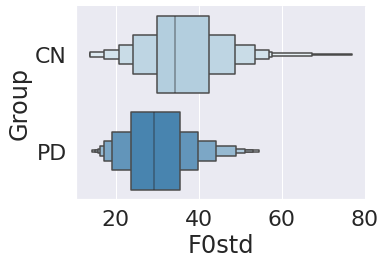

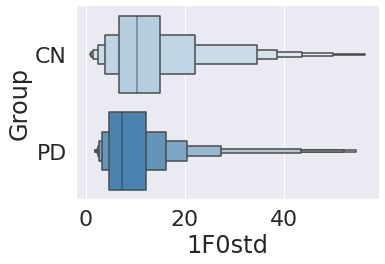

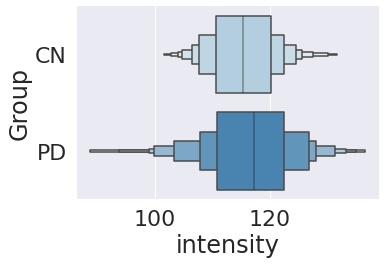

In [48]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
   # plt.savefig(f'/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Plots/TDU_{nome}', facecolor='white', dpi=600)

## Read Passage 

In [49]:
#read = read.rename(columns={'F0std': 'F0 std\nRP task (GermanPD)'})
grouped = read.groupby("label")  #here we extract the values by category


control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")

task = read.columns[:-2].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(read.columns[:-2])])
control_all_feat = np.array([control[feat] for feat in np.array(read.columns[:-2])])

#data = [alzheimer_all_feat, others_all_feat, parkinson_all_feat, control_all_feat, ataxia_all_feat]

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Results/readtext.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    


kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Results/readtext.txt')
holm_correction(kruskal_1)
#kruskal_1

(['kruskal results for F0std controls vs. parkinson 1.5541890425655812e-07 ',
  'kruskal results for intensity controls vs. parkinson 2.0376209859496256e-05 '],
 [4.6625671276967436e-07, 3.056431478924439e-05])

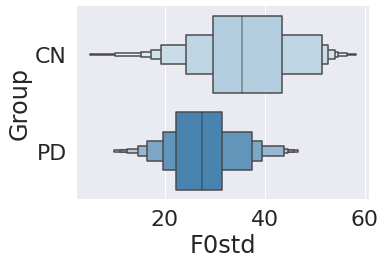

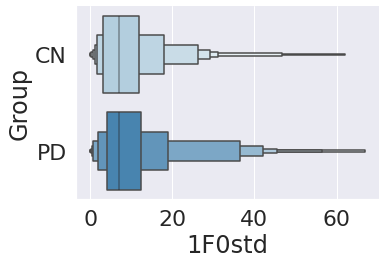

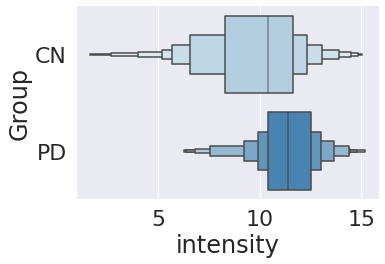

In [50]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/GERMAN/ACOUSTIC/Plots/RP_{nome}', facecolor='white', dpi=600)